In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df_max=pd.read_csv("Max_Tem.csv")

In [3]:
df_min=pd.read_csv("Min_Temp.csv")

In [4]:
df_max.head()

,Product code,Bureau of Meteorology station number,Year,Month,Day,Maximum temperature (Degree C),Days of accumulation of maximum temperature,Quality
0,IDCJAC0010,66062,1859,1,1,24.4,NaN,Y
1,IDCJAC0010,66062,1859,1,2,24.4,1.0,Y
2,IDCJAC0010,66062,1859,1,3,24.2,1.0,Y
3,IDCJAC0010,66062,1859,1,4,24.7,1.0,Y
4,IDCJAC0010,66062,1859,1,5,24.6,1.0,Y


In [5]:
df_min.head()

,Product code,Bureau of Meteorology station number,Year,Month,Day,Minimum temperature (Degree C),Days of accumulation of minimum temperature,Quality
0,IDCJAC0011,66062,1859,1,1,14.5,NaN,Y
1,IDCJAC0011,66062,1859,1,2,15.7,1.0,Y
2,IDCJAC0011,66062,1859,1,3,15.3,1.0,Y
3,IDCJAC0011,66062,1859,1,4,17.4,1.0,Y
4,IDCJAC0011,66062,1859,1,5,16.9,1.0,Y


In [6]:
df_max.isnull().sum(),df_min.isnull().sum()

(Product code                                     0
 Bureau of Meteorology station number             0
 Year                                             0
 Month                                            0
 Day                                              0
 Maximum temperature (Degree C)                 152
 Days of accumulation of maximum temperature    285
 Quality                                        153
 dtype: int64,
 Product code                                     0
 Bureau of Meteorology station number             0
 Year                                             0
 Month                                            0
 Day                                              0
 Minimum temperature (Degree C)                 151
 Days of accumulation of minimum temperature    284
 Quality                                        152
 dtype: int64)

In [7]:
cat_cols=[feature for feature in df_max.columns if df_max[feature].dtypes=="O"]

num_cols=[feature for feature in df_max.columns if df_max[feature].dtypes!="O"]
print(cat_cols)
print("")
print(num_cols)

['Product code', 'Quality']

['Bureau of Meteorology station number', 'Year', 'Month', 'Day', 'Maximum temperature (Degree C)', 'Days of accumulation of maximum temperature']


In [8]:
df_max["Maximum temperature (Degree C)"]=df_max["Maximum temperature (Degree C)"].fillna(df_max["Maximum temperature (Degree C)"].mean())

In [9]:
df_min["Minimum temperature (Degree C)"]=df_min["Minimum temperature (Degree C)"].fillna(df_min["Minimum temperature (Degree C)"].mean())

In [10]:
import datetime as dt

In [11]:
def datetime(row):
    return dt.datetime(row.Year,row.Month,row.Day)

In [12]:
df_max["Date"]=df_max.apply(datetime,axis=1)
df_min["Date"]=df_min.apply(datetime,axis=1)

df_max.set_index("Date",inplace=True)
df_min.set_index("Date",inplace=True)

drop_cols=[0,1,2,3,4,6,7]

df_max.drop(df_max.columns[drop_cols],axis=1,inplace=True)
df_min.drop(df_min.columns[drop_cols],axis=1,inplace=True)

df_max.rename(columns={"Maximum temperature (Degree C)":"T_Max"},inplace=True)
df_min.rename(columns={"Minimum temperature (Degree C)":"T_Min"},inplace=True)

In [13]:
df=df_max.merge(df_min,how="inner",left_on="Date",right_on="Date")

In [14]:
def avg(row):
    return (row.T_Max+row.T_Min)/2

In [15]:
df["T"]=df.apply(avg,axis=1)

In [16]:
df.head()

,T_Max,T_Min,T
Date,,,
1859-01-01,24.4,14.5,19.45
1859-01-02,24.4,15.7,20.05
1859-01-03,24.2,15.3,19.75
1859-01-04,24.7,17.4,21.05
1859-01-05,24.6,16.9,20.75


<AxesSubplot:xlabel='Date'>

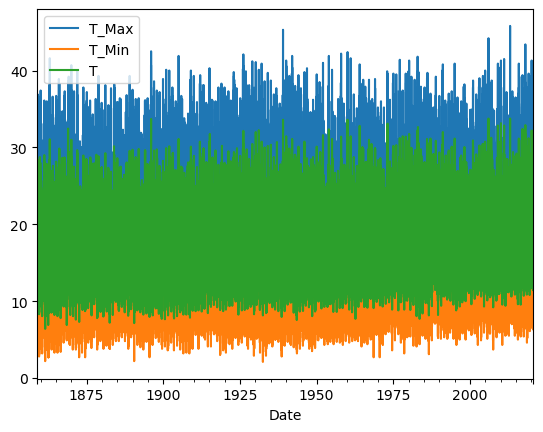

In [17]:
df.plot()

<AxesSubplot:xlabel='Date'>

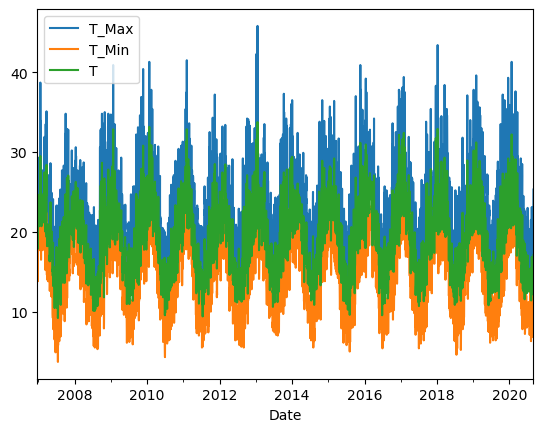

In [18]:
df[-5000:].plot()

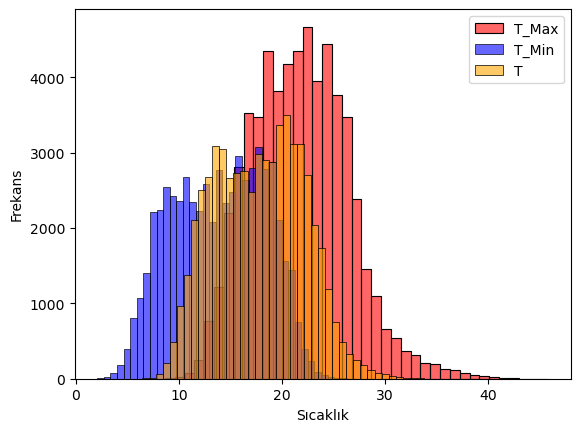

In [19]:
sns.histplot(df["T_Max"],bins=40,alpha=0.6,color="red",label="T_Max")
sns.histplot(df["T_Min"],bins=40,alpha=0.6,color="blue",label="T_Min")
sns.histplot(df["T"],bins=40,alpha=0.6,color="orange",label="T")
plt.legend()
plt.xlabel("Sıcaklık")
plt.ylabel("Frekans")
plt.show()


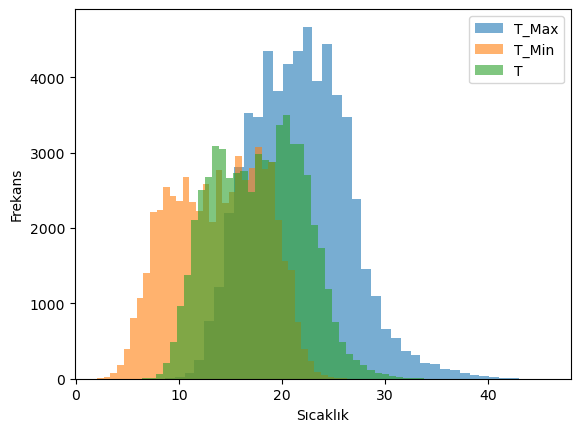

In [20]:
plt.hist(df["T_Max"],bins=40,alpha=0.6,label="T_Max")
plt.hist(df["T_Min"],bins=40,alpha=0.6,label="T_Min")
plt.hist(df["T"],bins=40,alpha=0.6,label="T")
plt.legend()
plt.xlabel("Sıcaklık")
plt.ylabel("Frekans")
plt.show()

In [21]:
df_season=df.copy(deep=True)

In [22]:
df_season["Month"]=df_season.index.month
mask=(df_season["Month"]>=5)& (df_season["Month"]<=10)


In [23]:
df_season["Winter"]=np.where(mask,1,0)
df_season["Summer"]=np.where(df_season["Winter"]!=1,1,0)
df_season


,T_Max,T_Min,T,Month,Winter,Summer
Date,,,,,,
1859-01-01,24.4,14.5,19.45,1,0,1
1859-01-02,24.4,15.7,20.05,1,0,1
1859-01-03,24.2,15.3,19.75,1,0,1
1859-01-04,24.7,17.4,21.05,1,0,1
1859-01-05,24.6,16.9,20.75,1,0,1
...,...,...,...,...,...,...
2020-08-26,19.6,6.8,13.20,8,1,0
2020-08-27,22.2,6.8,14.50,8,1,0
2020-08-28,19.7,10.4,15.05,8,1,0


<function matplotlib.pyplot.show(close=None, block=None)>

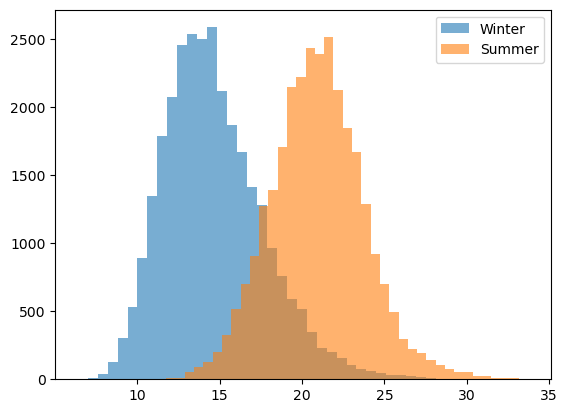

In [24]:
plt.hist(df_season[df_season["Winter"]==1]["T"],bins=40,alpha=0.6,label="Winter")
plt.hist(df_season[df_season["Summer"]==1]["T"],bins=40,alpha=0.6,label="Summer")
plt.legend()
plt.show

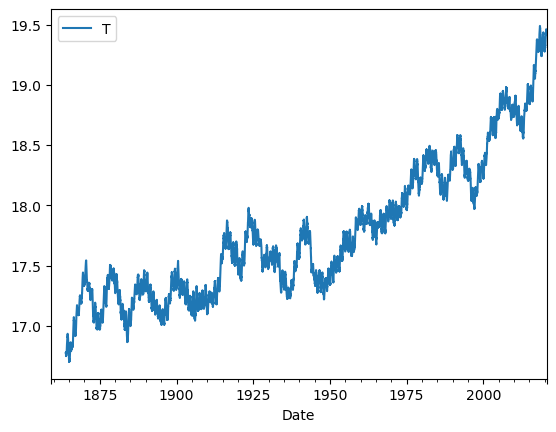

In [25]:
df["T"].rolling(window=360*5).mean().plot(label="T")
plt.legend()

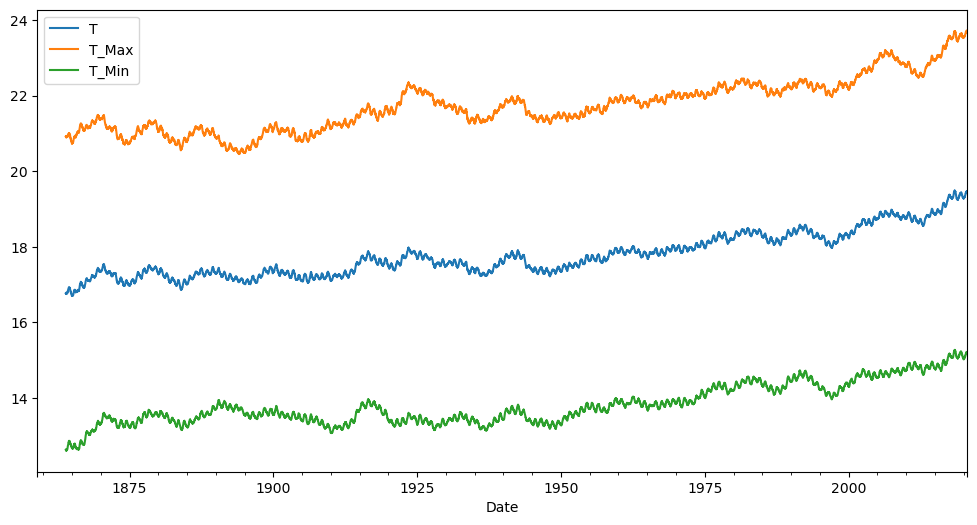

In [26]:
plt.figure(figsize=(12,6))
df["T"].rolling(window=360*5).mean().plot(label="T")
df["T_Max"].rolling(window=360*5).mean().plot(label="T_Max")
df["T_Min"].rolling(window=360*5).mean().plot(label="T_Min")
plt.legend()
plt.show()

In [27]:
df

,T_Max,T_Min,T
Date,,,
1859-01-01,24.4,14.5,19.45
1859-01-02,24.4,15.7,20.05
1859-01-03,24.2,15.3,19.75
1859-01-04,24.7,17.4,21.05
1859-01-05,24.6,16.9,20.75
...,...,...,...
2020-08-26,19.6,6.8,13.20
2020-08-27,22.2,6.8,14.50
2020-08-28,19.7,10.4,15.05


In [28]:
df.sort_index(inplace=True)

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [30]:
result_add = seasonal_decompose(df["T"], model="additive", extrapolate_trend="freq", period=365*10)



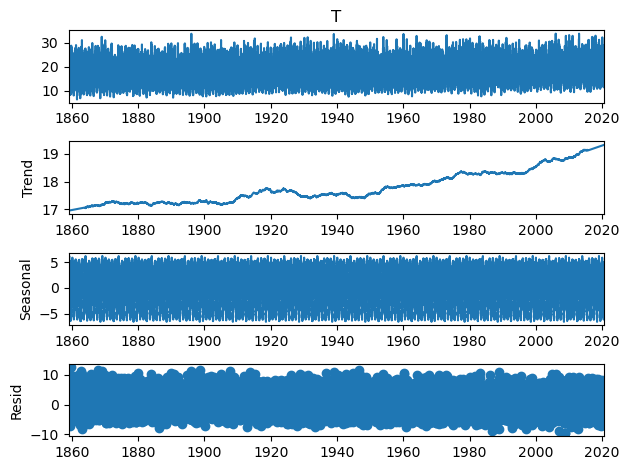

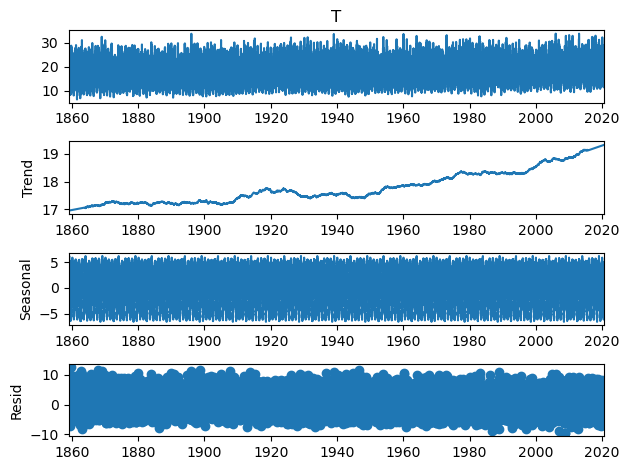

In [31]:
result_add.plot()

In [32]:
predicted_df=df["T"].to_frame().shift(1).rename(columns={"T":"T_Pred"})
actual_df=df["T"].to_frame().rename(columns={"T":"T_Actual"})

merge_df=pd.concat([actual_df,predicted_df],axis=1)

merge_df=merge_df[1:]
merge_df.head(10)

,T_Actual,T_Pred
Date,,
1859-01-02,20.05,19.45
1859-01-03,19.75,20.05
1859-01-04,21.05,19.75
1859-01-05,20.75,21.05
1859-01-06,19.05,20.75
1859-01-07,21.05,19.05
1859-01-08,21.85,21.05
1859-01-09,25.65,21.85
1859-01-10,22.30,25.65


In [33]:
from sklearn.metrics import mean_squared_error as MSE
from math import sqrt

predicted_df_err=sqrt(MSE(merge_df["T_Actual"],merge_df["T_Pred"]))
print ("rmse",predicted_df_err)

rmse 2.1793434827006175


<AxesSubplot:xlabel='Date'>

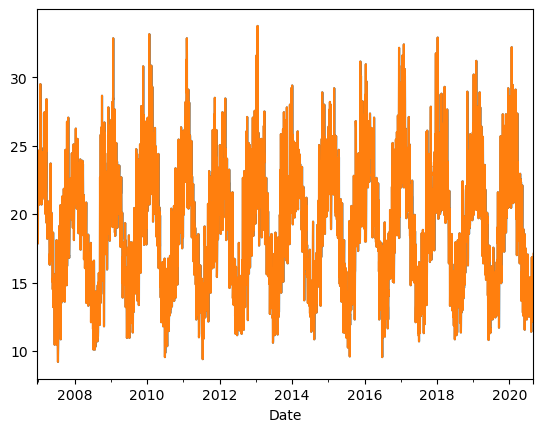

In [43]:
merge_df["T_Pred"][-5000:].plot()
merge_df["T_Actual"][-5000:].plot()

In [44]:
import statsmodels.api as sm

mod=sm.tsa.statespace.SARIMAX(merge_df["T_Actual"],order=(1,1,1),seasonal_order=(1,1,1,12),enforce_stationarity=False,enforce_invertibility=False)
results=mod.fit()

C:\Users\fAhRi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\fAhRi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


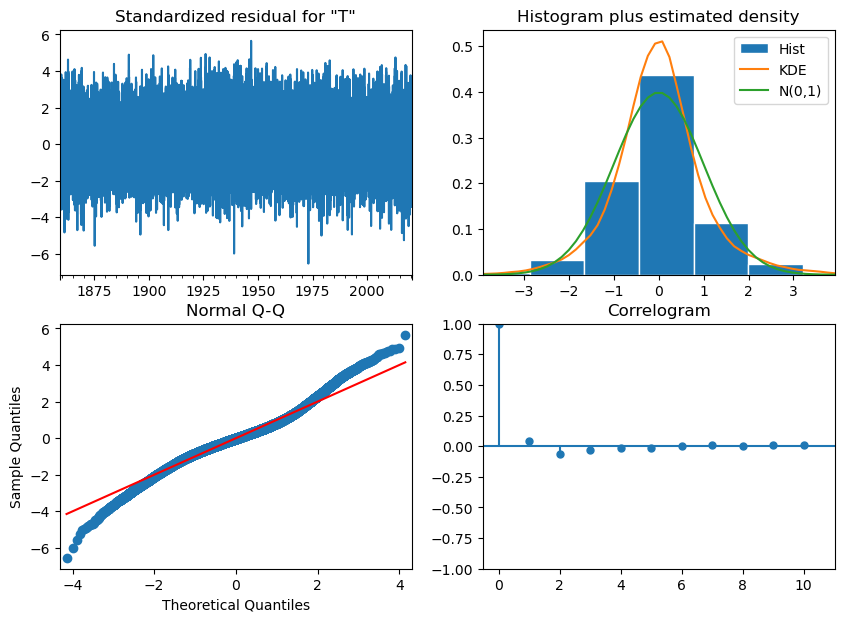

In [47]:
results.plot_diagnostics(figsize=(10,7))
plt.show()

In [49]:
pred=results.get_prediction(start=pd.to_datetime("2015-01-01"),dynamic=False)
pred_ci=pred.conf_int()

In [53]:
merge_df["T_Actual"].min()

6.4

In [78]:
df[df.index.year == 2015]

,T_Max,T_Min,T
Date,,,
2015-01-01,28.4,21.4,24.90
2015-01-02,28.5,21.2,24.85
2015-01-03,28.8,22.0,25.40
2015-01-04,30.4,22.4,26.40
2015-01-05,26.3,20.5,23.40
...,...,...,...
2015-12-27,23.0,17.1,20.05
2015-12-28,22.6,15.3,18.95
2015-12-29,24.9,15.4,20.15


In [63]:
pred_ci

,lower T_Actual,upper T_Actual
2015-01-01,18.456818,26.200021
2015-01-02,20.011422,27.754625
2015-01-03,20.076595,27.819798
2015-01-04,20.543766,28.286969
2015-01-05,21.237359,28.980562
...,...,...
2020-08-26,9.218071,16.961273
2020-08-27,9.731388,17.474589
2020-08-28,10.421828,18.165030
2020-08-29,10.829290,18.572491


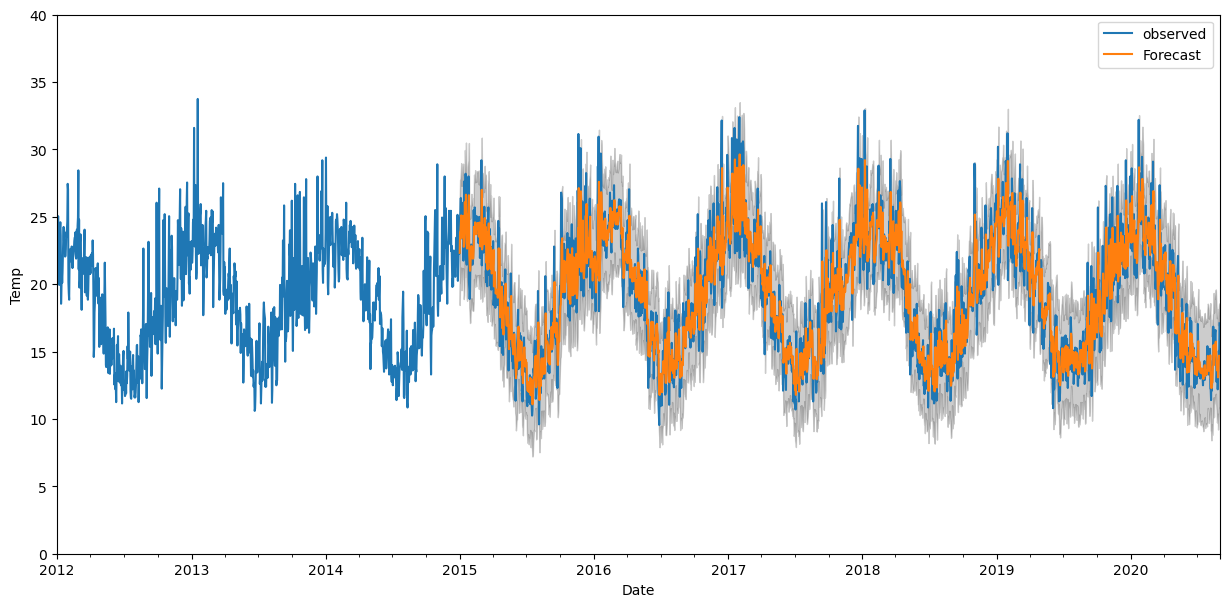

In [60]:
plt.figure(figsize=(15,7))
ax=merge_df["T_Actual"]["2012":].plot(label="observed")
pred.predicted_mean.plot(ax=ax,label="Forecast")

ax.fill_between(pred_ci.index,pred_ci.iloc[:,0],pred_ci.iloc[:,1],color="k",alpha=.2)

ax.set_xlabel("Date")
ax.set_ylabel("Temp")
plt.ylim([0,40])
plt.legend()
plt.show()

In [79]:
pred = results.get_prediction(start=pd.to_datetime("2021-08-30"), dynamic=False)
pred_value = pred.predicted_mean
pred_ci_value=pred.conf_int()
print(pred_value)

print(pred_ci_value)

2021-08-30    14.776197
Freq: D, dtype: float64
            lower T_Actual  upper T_Actual
2021-08-30       -0.906328       30.458723


In [72]:
df[df.index.month == 8]


,T_Max,T_Min,T
Date,,,
1859-08-01,13.7,7.2,10.45
1859-08-02,16.1,7.9,12.00
1859-08-03,16.2,7.9,12.05
1859-08-04,16.3,8.1,12.20
1859-08-05,17.1,7.1,12.10
...,...,...,...
2020-08-26,19.6,6.8,13.20
2020-08-27,22.2,6.8,14.50
2020-08-28,19.7,10.4,15.05
